In [34]:
import pandas as pd

In [52]:
import matplotlib.pyplot as plt

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('books.csv')

In [37]:
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


# How many rows and columns are there in books.csv dataset?

In [13]:
# number of rows
print("Number of rows",len(df)) 


#number of columns
print("Number of columns",len(df.columns))

399
24


# How many books do not have an original title?


In [12]:
df.original_title.isnull().sum()

36

# How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [41]:

df1 = df.dropna(subset=['original_title'],inplace=False)

In [42]:
unique_books_count = df1['book_id'].nunique()

In [43]:
print("Number of unique books:", unique_books_count)

Number of unique books: 363


# What is the average rating of all the books in the dataset based on ‘average_rating’?


In [44]:
average_rating = df['average_rating'].mean()

In [45]:
print("Average rating of all books:", average_rating)

Average rating of all books: 3.987079889807162


# Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [46]:
 books_2000 = df[df['original_publication_year'] == 2000]

In [47]:
 books_2000_count = len(books_2000)

In [48]:
 print("Number of books published in 2000:", books_2000_count)

Number of books published in 2000: 7


# Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [49]:
max_ratings_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]

In [50]:
max_ratings_title = max_ratings_book['original_title'].values[0]

In [51]:
 print("Book with the maximum number of ratings:", max_ratings_title)

Book with the maximum number of ratings: Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944


# Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [59]:
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [67]:
 df.loc[:, 'rating_bucket'] = pd.cut(df['average_rating'], buckets, right=False)


In [63]:
 rating_counts = df['rating_bucket'].value_counts().sort_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '[0.0, 0.5)'),
  Text(1, 0, '[0.5, 1.0)'),
  Text(2, 0, '[1.0, 1.5)'),
  Text(3, 0, '[1.5, 2.0)'),
  Text(4, 0, '[2.0, 2.5)'),
  Text(5, 0, '[2.5, 3.0)'),
  Text(6, 0, '[3.0, 3.5)'),
  Text(7, 0, '[3.5, 4.0)'),
  Text(8, 0, '[4.0, 4.5)'),
  Text(9, 0, '[4.5, 5.0)')])

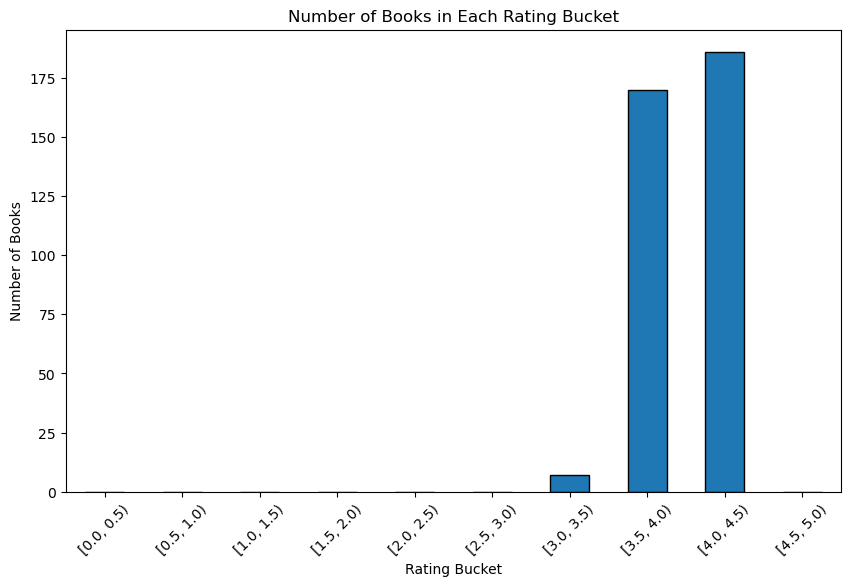

In [64]:
rating_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6))
plt.title('Number of Books in Each Rating Bucket')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)